# Data

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns# Figure size
X_train= pd.read_csv('X_train_6ZIKlTY.csv', index_col=0)
Y_train= pd.read_csv('y_train_lXj6X5y.csv',index_col=0)
X_test= pd.read_csv('X_test_oiZ2ukx.csv',index_col=0)


print("X Train set Shape:", X_train.shape, 'Y Train shape: ', Y_train.shape)
print("X test shape:", X_test.shape)
data=X_train
data['target'] = Y_train['target']
X_train.head(20)


X Train set Shape: (55603, 11) Y Train shape:  (55603, 1)
X test shape: (23672, 12)


,patient_id,cohort,sexM,gene,age_at_diagnosis,age,ledd,time_since_intake_on,time_since_intake_off,on,off,target
Index,,,,,,,,,,,,
0,IPLP5212,A,0,LRRK2+,48.5,52.1,607.0,1.9,NaN,7.0,NaN,34.7
1,IPLP5212,A,0,LRRK2+,48.5,53.0,666.0,1.9,17.6,12.0,44.0,38.1
2,IPLP5212,A,0,LRRK2+,48.5,53.9,717.0,1.2,NaN,6.0,NaN,41.6
3,IPLP5212,A,0,LRRK2+,48.5,54.8,770.0,1.5,NaN,11.0,NaN,44.9
4,IPLP5212,A,0,LRRK2+,48.5,56.9,885.0,0.3,NaN,24.0,NaN,52.0
5,IPLP5212,A,0,LRRK2+,48.5,57.5,NaN,2.4,NaN,16.0,NaN,53.9
6,IPLP5212,A,0,LRRK2+,48.5,58.9,835.0,NaN,NaN,10.0,37.0,57.8
7,IPLP5212,A,0,LRRK2+,48.5,59.9,888.0,0.2,9.6,31.0,36.0,60.1
8,IPLP5212,A,0,LRRK2+,48.5,60.9,952.0,1.5,NaN,11.0,NaN,62.0


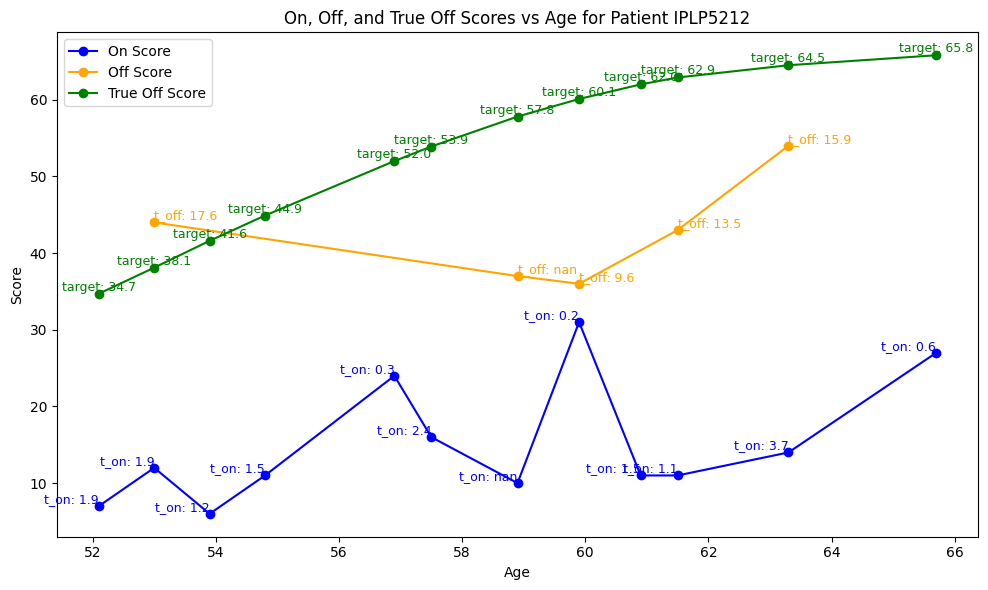

In [241]:
df_patient = data[data['patient_id'] == 'IPLP5212']

plt.figure(figsize=(10, 6))

# Plot On Score vs Age
on_data = df_patient.dropna(subset=['on'])
plt.plot(on_data['age'], on_data['on'], marker='o', linestyle='-', label='On Score', color='blue')
for _, row in on_data.iterrows():
    plt.text(row['age'], row['on'], f"t_on: {row['time_since_intake_on']}",
             fontsize=9, color='blue', verticalalignment='bottom', horizontalalignment='right')

# Plot Off Score vs Age
off_data = df_patient.dropna(subset=['off'])
plt.plot(off_data['age'], off_data['off'], marker='o', linestyle='-', label='Off Score', color='orange')
for _, row in off_data.iterrows():
    plt.text(row['age'], row['off'], f"t_off: {row['time_since_intake_off']}",
             fontsize=9, color='orange', verticalalignment='bottom', horizontalalignment='left')

# Plot True Off Score (Target) vs Age
target_data = df_patient.dropna(subset=['target'])
plt.plot(target_data['age'], target_data['target'], marker='o', linestyle='-', label='True Off Score', color='green')
for _, row in target_data.iterrows():
    plt.text(row['age'], row['target'], f"target: {row['target']}",
             fontsize=9, color='green', verticalalignment='bottom', horizontalalignment='center')

plt.xlabel("Age")
plt.ylabel("Score")
plt.title("On, Off, and True Off Scores vs Age for Patient IPLP5212")
plt.legend()
plt.tight_layout()
plt.show()

In [166]:
Y_train.head()

,target
Index,
0,34.7
1,38.1
2,41.6
3,44.9
4,52.0


In [167]:
X_test.head()

,patient_id,cohort,sexM,gene,age_at_diagnosis,age,ledd,time_since_intake_on,time_since_intake_off,on,off,time_since_diagnosis
Index,,,,,,,,,,,,
0,KQYS2327,A,1,NaN,43.8,48.5,791.0,1.7,NaN,25.0,NaN,4.7
1,KQYS2327,A,1,NaN,43.8,49.1,826.0,2.8,NaN,25.0,NaN,5.3
2,KQYS2327,A,1,NaN,43.8,49.5,848.0,0.7,13.8,33.0,41.0,5.7
3,KQYS2327,A,1,NaN,43.8,50.0,874.0,5.2,NaN,34.0,NaN,6.2
4,KQYS2327,A,1,NaN,43.8,50.8,924.0,3.4,13.7,30.0,47.0,7.0


Données démographiques du patient : Âge, sexe et âge au moment du diagnostic (symptômes moteurs).

Cohore: cohorte désigne un groupe de patients atteints de la maladie de Parkinson partageant des caractéristiques ou conditions communes et observés sur une période définie afin d’étudier la progression de la maladie et les résultats des traitements.

Informations génétiques : Marqueurs génétiques pertinents.

ledd = Informations sur les médicaments : Posologie (en dose quotidienne équivalente en lévodopa).

Scores Moteur MDS-UPDRS : Scores ON et OFF, avec le délai indiqué depuis la dernière prise de médicament.

Dans le test, time_since_diagnosis est aussi dispo

## Missing values

In [242]:
print('TRAIN SET MISSING VALUES (%):')
print(X_train.isna().sum()*100/len(X_train))
print('')

TRAIN SET MISSING VALUES (%):
patient_id                0.000000
cohort                    0.000000
sexM                      0.000000
gene                     32.296819
age_at_diagnosis          5.089653
age                       0.000000
ledd                     37.035771
time_since_intake_on     46.652159
time_since_intake_off    78.823085
on                       29.960614
off                      42.096649
target                    0.000000
dtype: float64



In [170]:
X_train.nunique()

patient_id               6971
cohort                      2
sexM                        2
gene                        4
age_at_diagnosis          575
age                      1177
ledd                     1356
time_since_intake_on       64
time_since_intake_off     180
on                         80
off                        93
target                    873
dtype: int64

In [243]:
Y_train.describe()

,target
count,55603.000000
mean,37.331606
std,16.504326
min,0.000000
25%,25.400000
50%,37.100000
75%,49.200000
max,109.500000


/var/folders/zn/74t7wv5n5r593c2rckpn_pbr0000gn/T/ipykernel_2293/3955445892.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_train['target']);


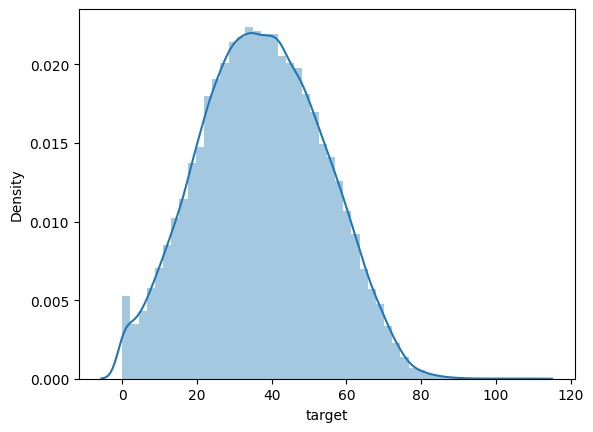

In [244]:
sns.distplot(Y_train['target']);


HistGradientBoosting Accuracy: 0.540
              precision    recall  f1-score   support

        GBA+       0.55      0.20      0.30       782
      LRRK2+       0.52      0.33      0.40       984
 No Mutation       0.54      0.86      0.67      1766
      OTHER+       0.48      0.13      0.20       233

    accuracy                           0.54      3765
   macro avg       0.53      0.38      0.39      3765
weighted avg       0.54      0.54      0.49      3765



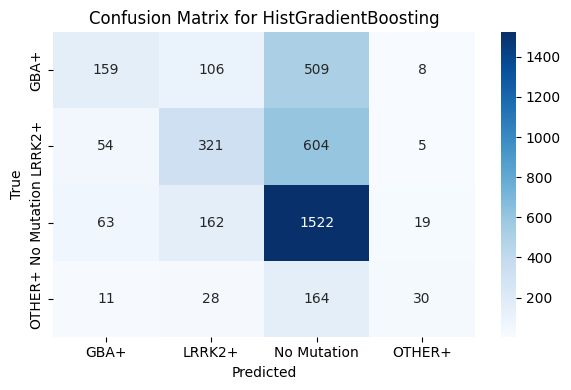

/Users/vakili/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.288
              precision    recall  f1-score   support

        GBA+       0.19      0.02      0.03       782
      LRRK2+       0.35      0.67      0.46       984
 No Mutation       0.76      0.15      0.25      1766
      OTHER+       0.10      0.61      0.17       233

    accuracy                           0.29      3765
   macro avg       0.35      0.36      0.23      3765
weighted avg       0.49      0.29      0.26      3765



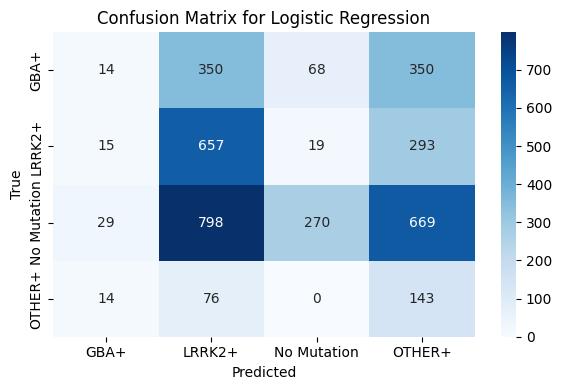

Random Forest Accuracy: 0.470
              precision    recall  f1-score   support

        GBA+       0.35      0.34      0.35       782
      LRRK2+       0.41      0.37      0.39       984
 No Mutation       0.56      0.61      0.59      1766
      OTHER+       0.29      0.26      0.27       233

    accuracy                           0.47      3765
   macro avg       0.40      0.39      0.40      3765
weighted avg       0.46      0.47      0.47      3765



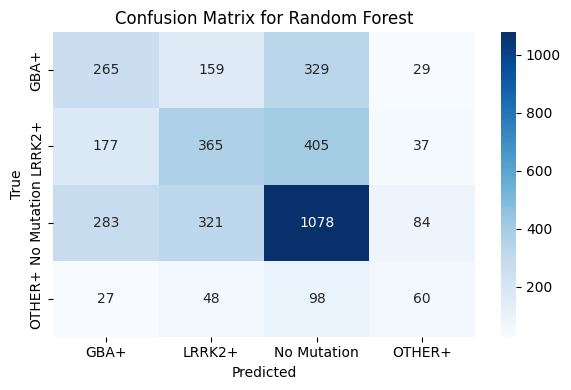

Decision Tree Accuracy: 0.472
              precision    recall  f1-score   support

        GBA+       0.36      0.43      0.39       782
      LRRK2+       0.42      0.38      0.40       984
 No Mutation       0.59      0.57      0.58      1766
      OTHER+       0.25      0.27      0.26       233

    accuracy                           0.47      3765
   macro avg       0.41      0.41      0.41      3765
weighted avg       0.48      0.47      0.47      3765



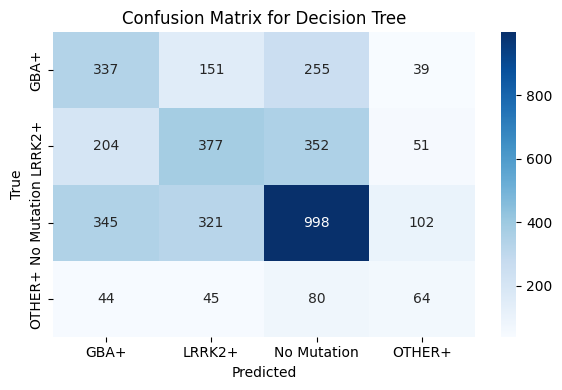

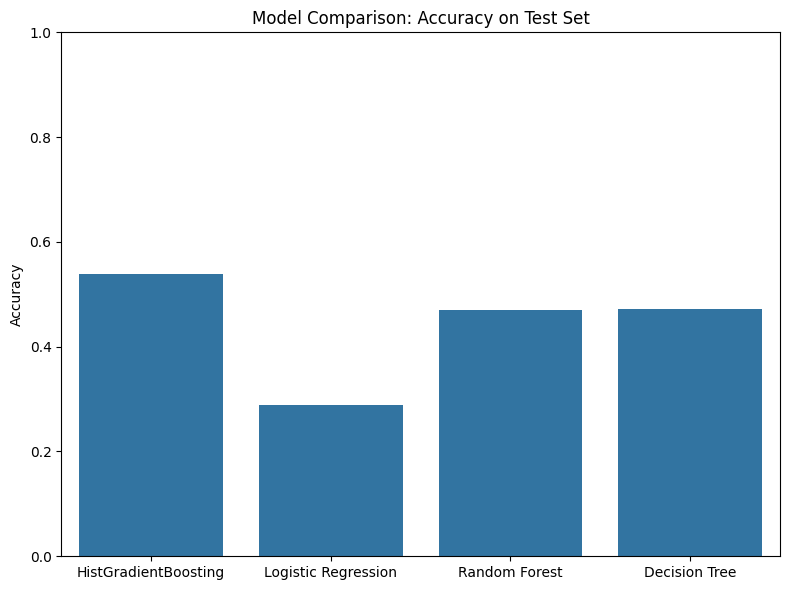

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Classifiers from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# --- Prepare the Data ---
# Filter to rows with non-missing gene values
df_model = data[data['gene'].notna()].copy()

# Encode gene labels to numeric values
le = LabelEncoder()
df_model['gene_enc'] = le.fit_transform(df_model['gene'])

# Select features: 'cohort', 'sexM', 'age_at_diagnosis', 'age', and 'target'
X = df_model[['cohort', 'sexM', 'age_at_diagnosis', 'age']].copy()
# One-hot encode 'cohort' (since it's categorical)
X = pd.get_dummies(X, columns=['cohort'], drop_first=True)

# Target variable: encoded gene labels
y = df_model['gene_enc']

# Split into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# --- Define Pipelines with Class Imbalance Handling ---
pipelines = {}

# 1. HistGradientBoostingClassifier (handles missing values natively)
pipelines['HistGradientBoosting'] = HistGradientBoostingClassifier(random_state=42)

# 2. Logistic Regression (with imputation, scaling, and balanced class weights)
pipelines['Logistic Regression'] = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(multi_class='multinomial', solver='lbfgs', 
                               max_iter=1000, random_state=42, class_weight='balanced'))
])

# 3. Random Forest (with imputation and balanced class weights)
pipelines['Random Forest'] = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

# 4. Decision Tree (with imputation and balanced class weights)
pipelines['Decision Tree'] = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

results = {}

# --- Train, Evaluate, and Plot for Each Model ---
for name, model in pipelines.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.3f}")
    
    # Convert numeric predictions back to gene labels for a clearer report.
    y_test_labels = le.inverse_transform(y_test)
    y_pred_labels = le.inverse_transform(y_pred)
    print(classification_report(y_test_labels, y_pred_labels))
    
    # Plot confusion matrix with gene labels
    cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

# --- Compare Model Accuracies ---
plt.figure(figsize=(8,6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Comparison: Accuracy on Test Set")
plt.tight_layout()
plt.show()

In [246]:
gene_counts = data['gene'].value_counts()
print(gene_counts)

gene
No Mutation    17811
LRRK2+          9331
GBA+            8097
OTHER+          2406
Name: count, dtype: int64


# Missing nan values

# For gene we use the trained model (without using target as a feature)

In [247]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

# Split data into rows with known gene values and rows with missing gene values
df_train = data[data['gene'].notna()].copy()
df_missing = data[data['gene'].isna()].copy()

# Define features to use for prediction
features = ['cohort', 'sexM', 'age_at_diagnosis', 'age', 'target']

# One-hot encode the 'cohort' column in the training set
X_train = pd.get_dummies(df_train[features], columns=['cohort'], drop_first=True)
y_train = df_train['gene']

# Do the same for the missing data
X_missing = pd.get_dummies(df_missing[features], columns=['cohort'], drop_first=True)
# Align the columns: if a column is missing in X_missing, add it with zeros
X_missing = X_missing.reindex(columns=X_train.columns, fill_value=0)

# Encode the target gene labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

# Train the HistGradientBoostingClassifier (which natively handles missing values)
model = HistGradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train_enc)

# Predict gene labels for the rows with missing gene values
preds = model.predict(X_missing)
predicted_gene = le.inverse_transform(preds)

# Fill the missing gene values in the original DataFrame
data.loc[data['gene'].isna(), 'gene'] = predicted_gene

# Show the updated gene counts
print(data['gene'].value_counts())

gene
No Mutation    31630
LRRK2+         12013
GBA+            9276
OTHER+          2684
Name: count, dtype: int64


# For Ledd we see that there is a practical linear model for each, so go to regression per patient who have at least 2 points, then for the other patient with less than 2 we train a model to predict theire ledd values. 

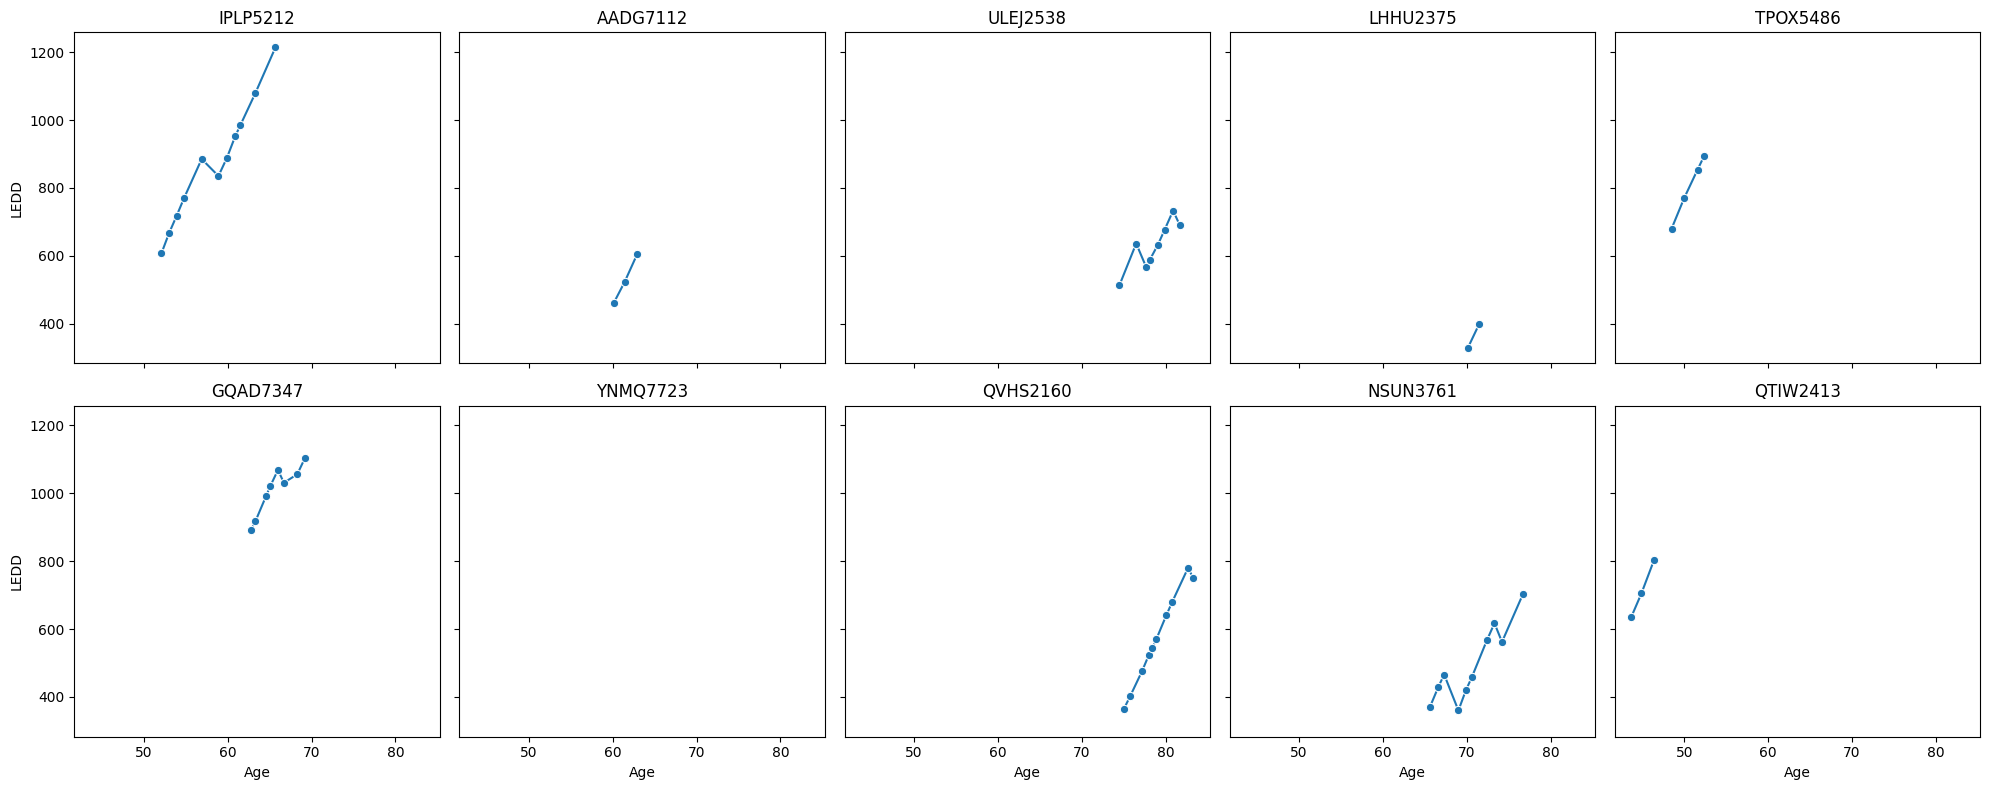

In [248]:
unique_patients = data['patient_id'].unique()[:10]
df_subset = data[data['patient_id'].isin(unique_patients)]

# Create a grid of subplots: 2 rows x 5 columns for 10 patients
fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Plot LEDD vs age for each patient
for ax, pid in zip(axes, unique_patients):
    df_patient = df_subset[df_subset['patient_id'] == pid]
    sns.lineplot(data=df_patient, x='age', y='ledd', marker='o', ax=ax)
    ax.set_title(pid)
    ax.set_xlabel("Age")
    ax.set_ylabel("LEDD")

plt.tight_layout()
plt.show()

In [249]:
data.head()

,patient_id,cohort,sexM,gene,age_at_diagnosis,age,ledd,time_since_intake_on,time_since_intake_off,on,off,target
Index,,,,,,,,,,,,
0,IPLP5212,A,0,LRRK2+,48.5,52.1,607.0,1.9,NaN,7.0,NaN,34.7
1,IPLP5212,A,0,LRRK2+,48.5,53.0,666.0,1.9,17.6,12.0,44.0,38.1
2,IPLP5212,A,0,LRRK2+,48.5,53.9,717.0,1.2,NaN,6.0,NaN,41.6
3,IPLP5212,A,0,LRRK2+,48.5,54.8,770.0,1.5,NaN,11.0,NaN,44.9
4,IPLP5212,A,0,LRRK2+,48.5,56.9,885.0,0.3,NaN,24.0,NaN,52.0


In [250]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge

def impute_ledd_ridge(group):
    # Only proceed if the patient has at least 2 valid LEDD values
    if group['ledd'].notna().sum() >= 2:
        # Extract rows with non-missing LEDD values for training
        valid = group[group['ledd'].notna()]
        X_train = valid['age'].values.reshape(-1, 1)
        y_train = valid['ledd'].values
        
        # Fit Ridge Regression model (adjust alpha as needed)
        ridge = Ridge(alpha=1.0)
        ridge.fit(X_train, y_train)
        
        # Identify rows with missing LEDD values
        missing_mask = group['ledd'].isna()
        if missing_mask.any():
            X_missing = group.loc[missing_mask, 'age'].values.reshape(-1, 1)
            group.loc[missing_mask, 'ledd'] = ridge.predict(X_missing)
    return group

# Apply the Ridge-based imputation for LEDD values for each patient
data_imputed = data.groupby('patient_id').apply(impute_ledd_ridge)

# (Optional) Reset the index if needed
data_imputed = data_imputed.reset_index(drop=True)

# Check the imputation result for a sample patient
sample_patient = data_imputed[data_imputed['patient_id'] == 'IPLP5212']
print(sample_patient[['patient_id', 'age', 'ledd']])

      patient_id   age         ledd
18384   IPLP5212  52.1   607.000000
18385   IPLP5212  53.0   666.000000
18386   IPLP5212  53.9   717.000000
18387   IPLP5212  54.8   770.000000
18388   IPLP5212  56.9   885.000000
18389   IPLP5212  57.5   842.438694
18390   IPLP5212  58.9   835.000000
18391   IPLP5212  59.9   888.000000
18392   IPLP5212  60.9   952.000000
18393   IPLP5212  61.5   984.000000
18394   IPLP5212  63.3  1079.000000
18395   IPLP5212  65.7  1214.000000


/var/folders/zn/74t7wv5n5r593c2rckpn_pbr0000gn/T/ipykernel_2293/1853479866.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_imputed = data.groupby('patient_id').apply(impute_ledd_ridge)


In [252]:
data=data_imputed.copy()

Linear Regression MSE: 30876.738
Decision Tree MSE: 41991.663
Random Forest MSE: 25485.103
HistGradientBoosting MSE: 21897.583
KNN MSE: 26581.510


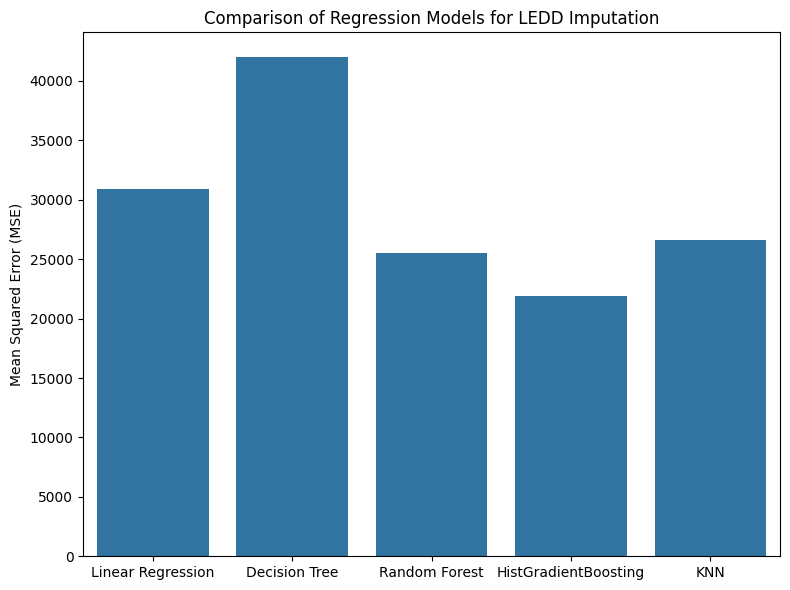

In [253]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Regressors from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Filter the data to rows with non-missing LEDD values
df_reg = data[data['ledd'].notna()].copy()

# Define features and target:
features = ['cohort', 'sexM', 'gene', 'age_at_diagnosis', 'age']
target = 'ledd'

X = df_reg[features].copy()
y = df_reg[target]

# Identify categorical and numerical features
cat_features = ['cohort', 'gene']
num_features = [col for col in features if col not in cat_features]

# Build a column transformer for preprocessing:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ]
)

# Define a dictionary of regressors to compare
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'HistGradientBoosting': HistGradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

results = {}

# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train each regressor within a pipeline and compute the MSE
for name, reg in regressors.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', reg)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse
    print(f"{name} MSE: {mse:.3f}")

# Plot the MSE values in a bar chart for comparison
plt.figure(figsize=(8,6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of Regression Models for LEDD Imputation")
plt.tight_layout()
plt.show()

In [254]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# -------------------------------
# 1. Prepare Training Data
# -------------------------------
# Select rows where LEDD is not missing
df_train = data[data['ledd'].notna()].copy()

# Define features and target
features = ['cohort', 'sexM', 'gene', 'age_at_diagnosis', 'age', 'on', 'off']
target = 'ledd'

X_train = df_train[features]
y_train = df_train[target]

# Identify categorical and numerical features
cat_features = ['cohort', 'gene']
num_features = [col for col in features if col not in cat_features]

# Build a ColumnTransformer to preprocess numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_features)
])

# Build the pipeline using HistGradientBoostingRegressor (which handled missing values in the training features)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', HistGradientBoostingRegressor(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# -------------------------------
# 2. Impute Missing LEDD Values
# -------------------------------
# Select rows where LEDD is missing
df_missing = data[data['ledd'].isna()].copy()
X_missing = df_missing[features]

# Use the trained pipeline to predict LEDD for the missing rows
predicted_ledd = pipeline.predict(X_missing)

# Fill the missing LEDD values in the original DataFrame with the predicted values
data.loc[data['ledd'].isna(), 'ledd'] = predicted_ledd

print("Missing LEDD values have been imputed using HistGradientBoostingRegressor.")
print("Donnée Manquante pour ledd: ", data['ledd'].isna().sum())

Missing LEDD values have been imputed using HistGradientBoostingRegressor.
Donnée Manquante pour ledd:  0


# On veut completer les mesures off

Model: Ridge Regression
     patient_id         MSE
0      AADG7112  160.023161
1      AAJS7617   23.729430
2      AALB3070   11.262240
3      AALZ2188   60.054226
4      AAMF6938   74.564359
...         ...         ...
6499   ZZLF7854   87.540108
6500   ZZMR9316   53.312676
6501   ZZNX1511  218.128582
6502   ZZPU4420   80.957475
6503   ZZTP1426  104.452703

[6504 rows x 2 columns]
Overall MSE for Ridge Regression: 954767.451



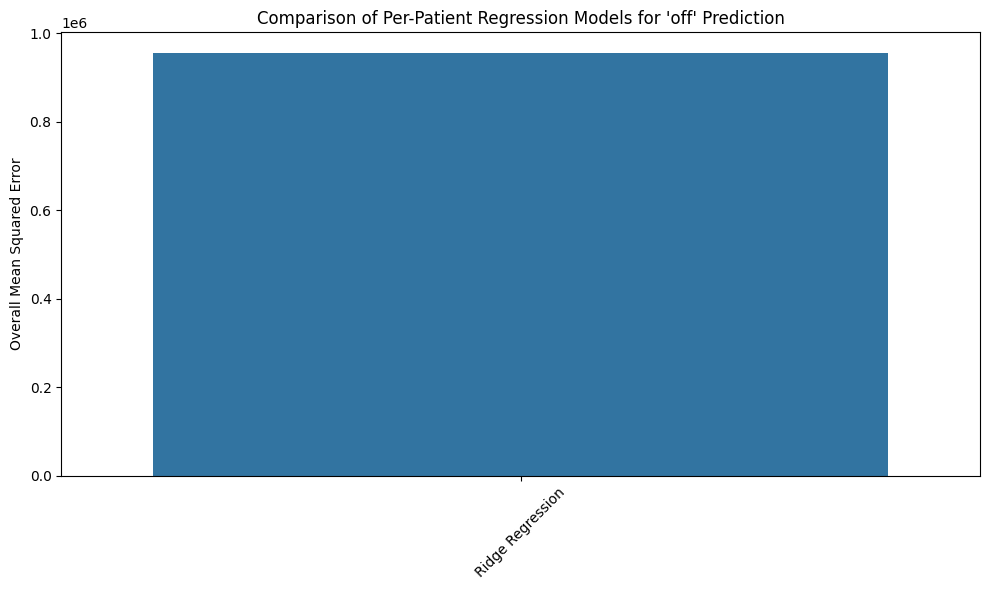

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
import matplotlib.pyplot as plt
import seaborn as sns

# Define the regression models to compare for predicting "off" from age
models = {
    "Ridge Regression": Ridge(alpha=10.0),
    #"Lasso Regression": Lasso(alpha=0.1),
    #"ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
}

# Dictionary to store per-patient MSE for each model
model_patient_mse = {name: {} for name in models.keys()}

# Iterate over each patient group
for pid, group in data.groupby('patient_id'):
    # Consider only patients with at least 2 valid "off" observations
    if group['off'].notna().sum() >= 2:
        df_valid = group[group['off'].notna()]
        # Use age as the only predictor
        X = df_valid['age'].values.reshape(-1, 1)
        y = df_valid['off'].values
        
        # Loop through each model
        for model_name, model in models.items():
            errors = []
            # Leave-One-Out Cross Validation for the current patient
            for i in range(len(X)):
                # Leave out the i-th observation
                X_train = np.delete(X, i, axis=0)
                y_train = np.delete(y, i)
                X_test = X[i].reshape(1, -1)
                y_test = y[i]
                
                # Clone the model to get a fresh instance for each iteration
                model_clone = clone(model)
                model_clone.fit(X_train, y_train)
                y_pred = model_clone.predict(X_test)
                
                # Compute squared error for the left-out sample
                errors.append((y_test - y_pred[0])**2)
            
            # Compute the mean squared error for this patient and model
            mse_patient = np.mean(errors)
            model_patient_mse[model_name][pid] = mse_patient

# Now, for each model, compute an overall MSE by averaging per-patient MSEs
overall_mse_results = {}
for model_name, mse_dict in model_patient_mse.items():
    # Convert the per-patient MSE dictionary into a DataFrame
    mse_df = pd.DataFrame(list(mse_dict.items()), columns=['patient_id', 'MSE'])
    overall_mse = mse_df['MSE'].sum()
    overall_mse_results[model_name] = overall_mse
    print(f"Model: {model_name}")
    print(mse_df)
    print(f"Overall MSE for {model_name}: {overall_mse:.3f}\n")

# Compare overall MSEs in a bar plot for visualization
plt.figure(figsize=(10,6))
sns.barplot(x=list(overall_mse_results.keys()), y=list(overall_mse_results.values()))
plt.ylabel("Overall Mean Squared Error")
plt.title("Comparison of Per-Patient Regression Models for 'off' Prediction")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [255]:
def impute_off_ridge(group):
    # Only proceed if the patient has at least 2 valid "off" observations
    if group['off'].notna().sum() >= 2:
        # Use rows with non-missing "off" values to train the model
        valid = group[group['off'].notna()]
        X_train = valid['age'].values.reshape(-1, 1)
        y_train = valid['off'].values
        
        # Fit a Ridge Regression model (adjust alpha if needed)
        ridge = Ridge(alpha=1.0)
        ridge.fit(X_train, y_train)
        
        # Identify rows with missing "off" values and predict them
        missing_mask = group['off'].isna()
        if missing_mask.any():
            X_missing = group.loc[missing_mask, 'age'].values.reshape(-1, 1)
            group.loc[missing_mask, 'off'] = ridge.predict(X_missing)
    return group

# Apply the Ridge-based imputation for "off" values for each patient
data_imputed_off = data.groupby('patient_id').apply(impute_off_ridge)

# Optionally reset the index if needed
data_imputed_off = data_imputed_off.reset_index(drop=True)

# Check the imputation result for a sample patient (for example, IPLP5212)
sample_patient = data_imputed_off[data_imputed_off['patient_id'] == 'IPLP5212']
print(sample_patient[['patient_id', 'age', 'off']])

      patient_id   age        off
18384   IPLP5212  52.1  38.620294
18385   IPLP5212  53.0  44.000000
18386   IPLP5212  53.9  39.662326
18387   IPLP5212  54.8  40.183342
18388   IPLP5212  56.9  41.399046
18389   IPLP5212  57.5  41.746390
18390   IPLP5212  58.9  37.000000
18391   IPLP5212  59.9  36.000000
18392   IPLP5212  60.9  43.714673
18393   IPLP5212  61.5  43.000000
18394   IPLP5212  63.3  54.000000
18395   IPLP5212  65.7  46.493424


/var/folders/zn/74t7wv5n5r593c2rckpn_pbr0000gn/T/ipykernel_2293/400147292.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_imputed_off = data.groupby('patient_id').apply(impute_off_ridge)


Exemple par rapport au début

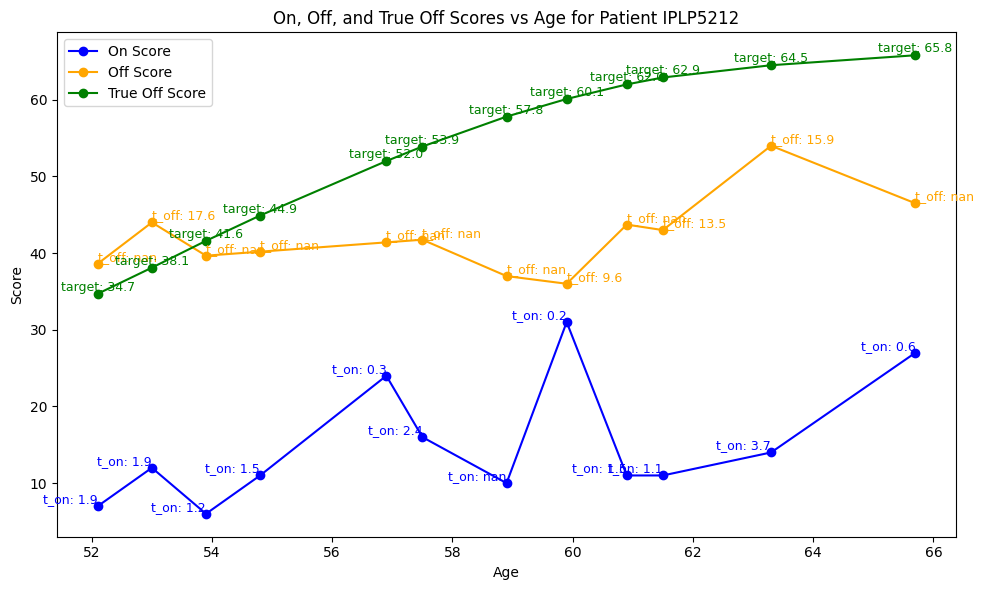

In [256]:
df_patient = data_imputed_off[data_imputed_off['patient_id'] == 'IPLP5212']

plt.figure(figsize=(10, 6))

# Plot On Score vs Age
on_data = df_patient.dropna(subset=['on'])
plt.plot(on_data['age'], on_data['on'], marker='o', linestyle='-', label='On Score', color='blue')
for _, row in on_data.iterrows():
    plt.text(row['age'], row['on'], f"t_on: {row['time_since_intake_on']}",
             fontsize=9, color='blue', verticalalignment='bottom', horizontalalignment='right')

# Plot Off Score vs Age
off_data = df_patient.dropna(subset=['off'])
plt.plot(off_data['age'], off_data['off'], marker='o', linestyle='-', label='Off Score', color='orange')
for _, row in off_data.iterrows():
    plt.text(row['age'], row['off'], f"t_off: {row['time_since_intake_off']}",
             fontsize=9, color='orange', verticalalignment='bottom', horizontalalignment='left')

# Plot True Off Score (Target) vs Age
target_data = df_patient.dropna(subset=['target'])
plt.plot(target_data['age'], target_data['target'], marker='o', linestyle='-', label='True Off Score', color='green')
for _, row in target_data.iterrows():
    plt.text(row['age'], row['target'], f"target: {row['target']}",
             fontsize=9, color='green', verticalalignment='bottom', horizontalalignment='center')

plt.xlabel("Age")
plt.ylabel("Score")
plt.title("On, Off, and True Off Scores vs Age for Patient IPLP5212")
plt.legend()
plt.tight_layout()
plt.show()

In [259]:
data= data_imputed_off.copy()
data['off'].isna().sum()

np.int64(1794)

Linear Regression MSE: 147.340
Decision Tree MSE: 147.159
Random Forest MSE: 80.072
HistGradientBoosting MSE: 80.209
KNN MSE: 104.651


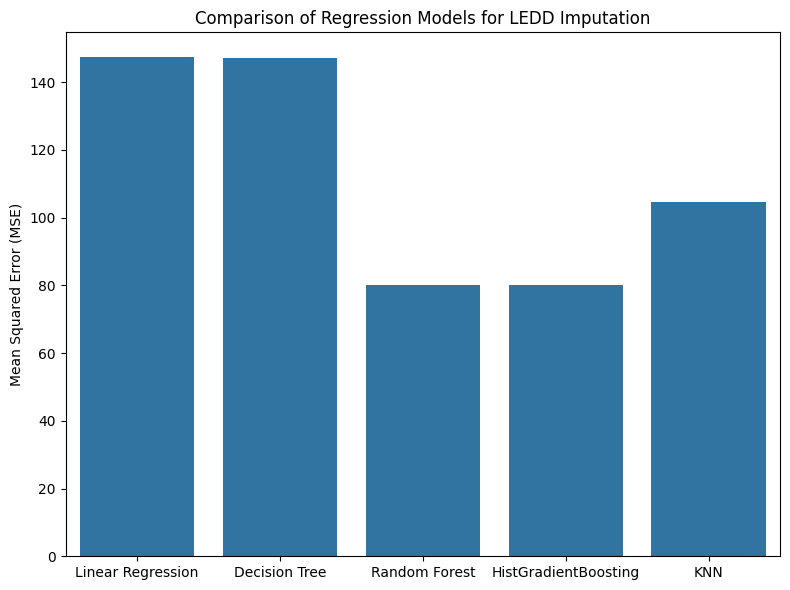

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Regressors from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Filter the data to rows with non-missing LEDD values
df_reg = data[data['off'].notna()].copy()

# Define features and target:
features = ['cohort', 'sexM', 'gene', 'age_at_diagnosis', 'age', 'ledd', 'time_since_intake_on', 'time_since_intake_off', 'on']
target = 'off'

X = df_reg[features].copy()
y = df_reg[target]

# Identify categorical and numerical features
cat_features = ['cohort', 'gene']
num_features = [col for col in features if col not in cat_features]

# Build a column transformer for preprocessing:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ]
)

# Define a dictionary of regressors to compare
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'HistGradientBoosting': HistGradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

results = {}

# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train each regressor within a pipeline and compute the MSE
for name, reg in regressors.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', reg)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse
    print(f"{name} MSE: {mse:.3f}")

# Plot the MSE values in a bar chart for comparison
plt.figure(figsize=(8,6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of Regression Models for LEDD Imputation")
plt.tight_layout()
plt.show()

In [260]:
data['off'].isna().sum()

np.int64(1794)

In [261]:
# -------------------------------
# 1. Prepare Training Data
# -------------------------------
# Select rows where LEDD is not missing
df_train = data[data['off'].notna()].copy()

# Define features and target

features = ['cohort', 'sexM', 'gene', 'age_at_diagnosis', 'age', 'ledd', 'time_since_intake_on', 'time_since_intake_off', 'on']
target = 'off'

X_train = df_train[features]
y_train = df_train[target]

# Identify categorical and numerical features
cat_features = ['cohort', 'gene']
num_features = [col for col in features if col not in cat_features]

# Build a ColumnTransformer to preprocess numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_features)
])

# Build the pipeline using HistGradientBoostingRegressor (which handled missing values in the training features)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# -------------------------------
# 2. Impute Missing LEDD Values
# -------------------------------
# Select rows where LEDD is missing
df_missing = data[data['off'].isna()].copy()
X_missing = df_missing[features]

# Use the trained pipeline to predict LEDD for the missing rows
predicted_ledd = pipeline.predict(X_missing)

# Fill the missing LEDD values in the original DataFrame with the predicted values
data.loc[data['off'].isna(), 'off'] = predicted_ledd

print("Missing LEDD values have been imputed using HistGradientBoostingRegressor.")
print("Donnée Manquante pour off: ", data['off'].isna().sum())

Missing LEDD values have been imputed using HistGradientBoostingRegressor.
Donnée Manquante pour off:  0


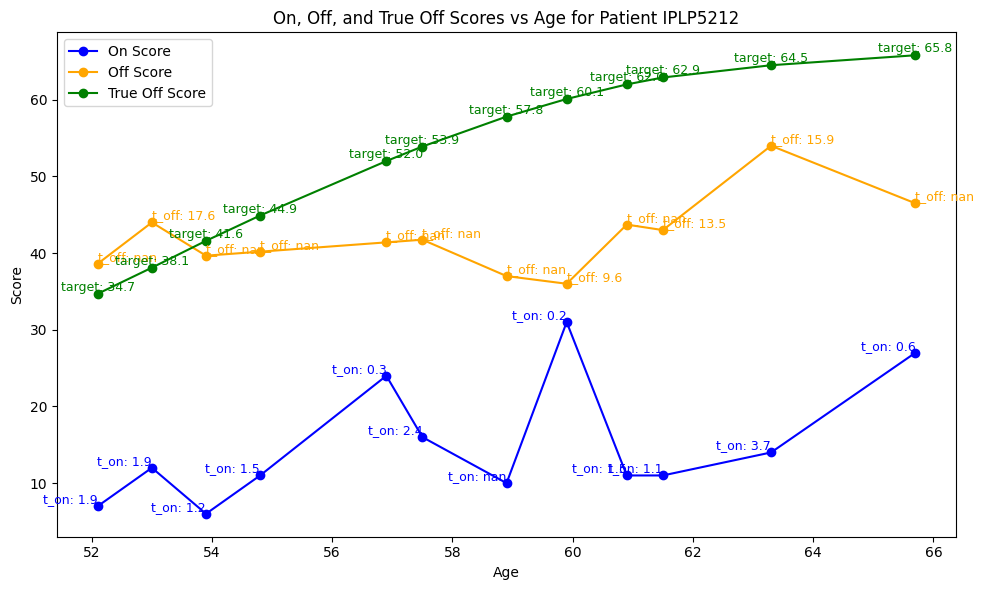

In [262]:
df_patient = data[data['patient_id'] == 'IPLP5212']

plt.figure(figsize=(10, 6))

# Plot On Score vs Age
on_data = df_patient.dropna(subset=['on'])
plt.plot(on_data['age'], on_data['on'], marker='o', linestyle='-', label='On Score', color='blue')
for _, row in on_data.iterrows():
    plt.text(row['age'], row['on'], f"t_on: {row['time_since_intake_on']}",
             fontsize=9, color='blue', verticalalignment='bottom', horizontalalignment='right')

# Plot Off Score vs Age
off_data = df_patient.dropna(subset=['off'])
plt.plot(off_data['age'], off_data['off'], marker='o', linestyle='-', label='Off Score', color='orange')
for _, row in off_data.iterrows():
    plt.text(row['age'], row['off'], f"t_off: {row['time_since_intake_off']}",
             fontsize=9, color='orange', verticalalignment='bottom', horizontalalignment='left')

# Plot True Off Score (Target) vs Age
target_data = df_patient.dropna(subset=['target'])
plt.plot(target_data['age'], target_data['target'], marker='o', linestyle='-', label='True Off Score', color='green')
for _, row in target_data.iterrows():
    plt.text(row['age'], row['target'], f"target: {row['target']}",
             fontsize=9, color='green', verticalalignment='bottom', horizontalalignment='center')

plt.xlabel("Age")
plt.ylabel("Score")
plt.title("On, Off, and True Off Scores vs Age for Patient IPLP5212")
plt.legend()
plt.tight_layout()
plt.show()

# ON Completion

On peut maitenant utiliser la mesure off prédite precedement pour prédire la valeure on

In [220]:
# Dictionary to store the MSE for each patient for predicting "on"
patient_mse_on = {}

# Iterate over each patient group
for pid, group in data.groupby('patient_id'):
    # Consider only patients with at least 2 non-missing "on" observations
    if group['on'].notna().sum() >= 2:
        # Use only rows with non-missing "on" values
        df_valid = group[group['on'].notna()]
        # Predictors: "age" and "off" (the off measure should be already imputed)
        X = df_valid[['age', 'off']].values
        y = df_valid['on'].values
        
        errors = []
        # Perform leave-one-out cross validation for the current patient
        for i in range(len(X)):
            # Create train/test split: leave out the i-th observation
            X_train = np.delete(X, i, axis=0)
            y_train = np.delete(y, i)
            X_test = X[i].reshape(1, -1)
            y_test = y[i]
            
            # Fit a fresh instance of Ridge Regression on the training samples
            model = Ridge(alpha=10.0)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            # Calculate the squared error for the left-out sample
            errors.append((y_test - y_pred[0]) ** 2)
        
        mse_patient = np.mean(errors)
        patient_mse_on[pid] = mse_patient

# Convert the patient MSE dictionary to a DataFrame for display
mse_df_on = pd.DataFrame(list(patient_mse_on.items()), columns=['patient_id', 'MSE_on'])
print(mse_df_on)

# Compute an overall MSE by averaging the per-patient MSE values
overall_mse_on = np.mean(list(patient_mse_on.values()))
print("Overall MSE for per-patient Ridge regression on 'on' (using age and off):", overall_mse_on)

     patient_id     MSE_on
0      AADG7112   2.623510
1      AALZ2188  19.336313
2      AAMF6938   9.000000
3      AAQZ0968  74.022082
4      AAUC0739  10.863332
...         ...        ...
5812   ZZIE1203   4.000000
5813   ZZLF7854  19.492037
5814   ZZMR9316  76.442302
5815   ZZNX1511  10.792336
5816   ZZPU4420  11.013727

[5817 rows x 2 columns]
Overall MSE for per-patient Ridge regression on 'on' (using age and off): 34.05812984118294


In [263]:
def impute_on_ridge(group):
    # Proceed only if the patient has at least 2 non-missing "on" values
    if group['on'].notna().sum() >= 2:
        # Use rows with non-missing "on" values to train the model
        valid = group[group['on'].notna()]
        X_train = valid[['age', 'off']].values
        y_train = valid['on'].values
        
        # Fit a Ridge Regression model (adjust alpha if needed)
        ridge = Ridge(alpha=10.0)
        ridge.fit(X_train, y_train)
        
        # Identify rows with missing "on" values
        missing_mask = group['on'].isna()
        if missing_mask.any():
            X_missing = group.loc[missing_mask, ['age', 'off']].values
            group.loc[missing_mask, 'on'] = ridge.predict(X_missing)
    return group

# Apply the Ridge-based imputation for "on" values for each patient
data_imputed_on = data.groupby('patient_id').apply(impute_on_ridge)

# Optionally reset the index
data_imputed_on = data_imputed_on.reset_index(drop=True)

# Check the imputation result for a sample patient (e.g., IPLP5212)
sample_patient = data_imputed_on[data_imputed_on['patient_id'] == 'IPLP5212']
print(sample_patient[['patient_id', 'age', 'off', 'on']])

      patient_id   age        off    on
18384   IPLP5212  52.1  38.620294   7.0
18385   IPLP5212  53.0  44.000000  12.0
18386   IPLP5212  53.9  39.662326   6.0
18387   IPLP5212  54.8  40.183342  11.0
18388   IPLP5212  56.9  41.399046  24.0
18389   IPLP5212  57.5  41.746390  16.0
18390   IPLP5212  58.9  37.000000  10.0
18391   IPLP5212  59.9  36.000000  31.0
18392   IPLP5212  60.9  43.714673  11.0
18393   IPLP5212  61.5  43.000000  11.0
18394   IPLP5212  63.3  54.000000  14.0
18395   IPLP5212  65.7  46.493424  27.0


/var/folders/zn/74t7wv5n5r593c2rckpn_pbr0000gn/T/ipykernel_2293/601965229.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_imputed_on = data.groupby('patient_id').apply(impute_on_ridge)


In [264]:
data_imputed_on['on'].isna().sum()

np.int64(5681)

Linear Regression MSE: 15.970
Decision Tree MSE: 15.785
Random Forest MSE: 7.935
HistGradientBoosting MSE: 6.605
KNN MSE: 14.642


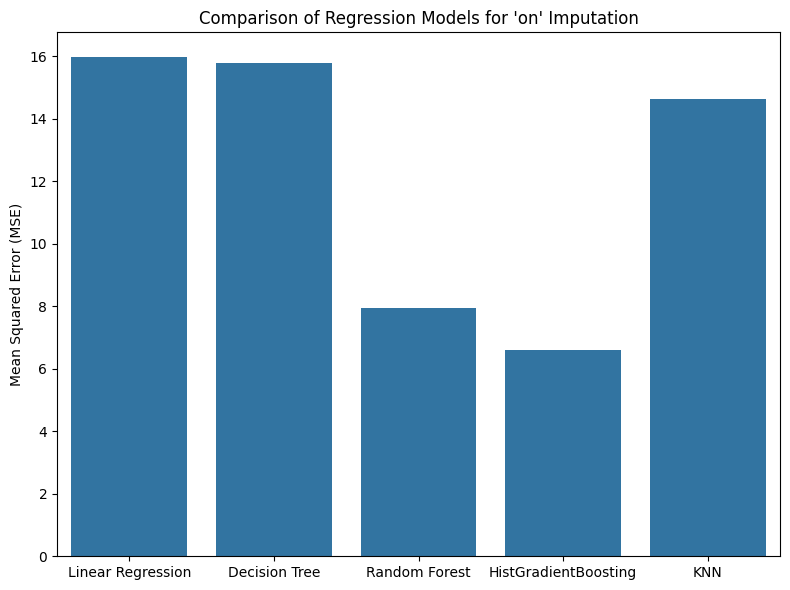

In [223]:
# Filter the data to rows with non-missing "on" values
df_reg = data[data['on'].notna()].copy()

# Define features and target for imputing "on"
features = ['cohort', 'sexM', 'gene', 'age_at_diagnosis', 'age', 'ledd', 
            'time_since_intake_on', 'time_since_intake_off', 'off']
target = 'on'

X = df_reg[features].copy()
y = df_reg[target]

# Identify categorical and numerical features
cat_features = ['cohort', 'gene']
num_features = [col for col in features if col not in cat_features]

# Build a column transformer for preprocessing:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ]
)

# Define a dictionary of regressors to compare
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'HistGradientBoosting': HistGradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor()
}

results = {}

# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train each regressor within a pipeline and compute the MSE
for name, reg in regressors.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', reg)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse
    print(f"{name} MSE: {mse:.3f}")

# Plot the MSE values in a bar chart for comparison
plt.figure(figsize=(8,6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of Regression Models for 'on' Imputation")
plt.tight_layout()
plt.show()

In [265]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Assume 'data' is your DataFrame

# -------------------------------
# 1. Prepare Training Data (non-missing "on" values)
# -------------------------------
df_train = data[data['on'].notna()].copy()

# Define features and target for predicting "on"
features = ['cohort', 'sexM', 'gene', 'age_at_diagnosis', 'age', 'ledd', 
            'time_since_intake_on', 'time_since_intake_off', 'off']
target = 'on'

X_train = df_train[features].copy()
y_train = df_train[target].copy()

# Identify categorical and numerical features
cat_features = ['cohort', 'gene']
num_features = [col for col in features if col not in cat_features]

# Build a ColumnTransformer for preprocessing:
# - Numerical features: impute missing values (if any) with median and then standardize.
# - Categorical features: impute missing values with the most frequent value and then one-hot encode.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ]
)

# -------------------------------
# 2. Build and Train the Pipeline
# -------------------------------
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', HistGradientBoostingRegressor(random_state=42))
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# -------------------------------
# 3. Predict and Fill Missing "on" Values
# -------------------------------
# Select rows where "on" is missing
df_missing = data[data['on'].isna()].copy()
X_missing = df_missing[features].copy()

# Predict "on" for missing rows
predicted_on = pipeline.predict(X_missing)

# Fill the missing "on" values in the original DataFrame
data.loc[data['on'].isna(), 'on'] = predicted_on

print("Missing 'on' values have been imputed using HistGradientBoostingRegressor.")

# Optionally, check a sample patient (e.g., IPLP5212) to verify imputation:
sample_patient = data[data['patient_id'] == 'IPLP5212']

Missing 'on' values have been imputed using HistGradientBoostingRegressor.


In [266]:
print(data['on'].isna().sum())

0


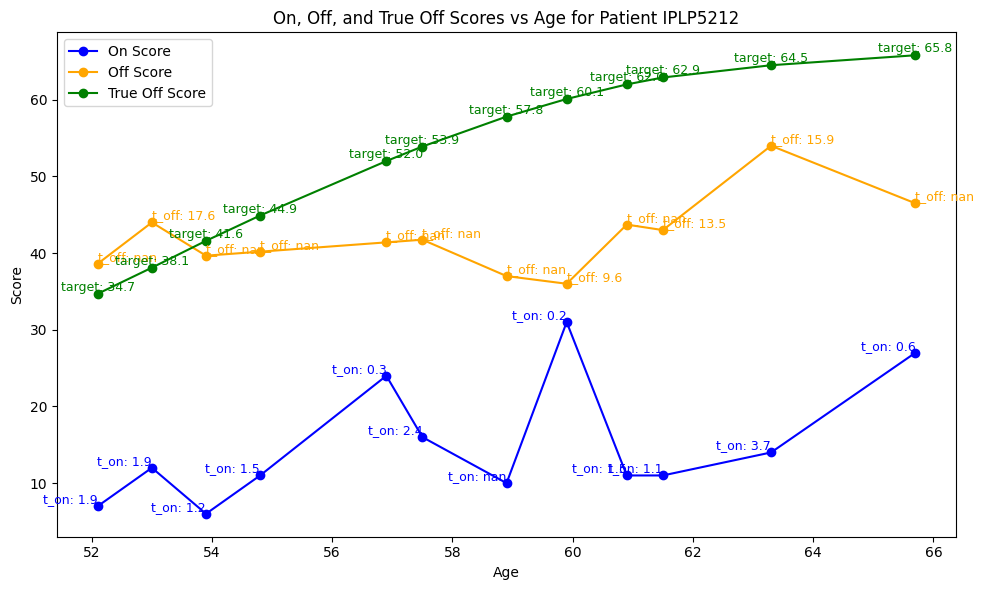

In [267]:
df_patient = data[data['patient_id'] == 'IPLP5212']

plt.figure(figsize=(10, 6))

# Plot On Score vs Age
on_data = df_patient.dropna(subset=['on'])
plt.plot(on_data['age'], on_data['on'], marker='o', linestyle='-', label='On Score', color='blue')
for _, row in on_data.iterrows():
    plt.text(row['age'], row['on'], f"t_on: {row['time_since_intake_on']}",
             fontsize=9, color='blue', verticalalignment='bottom', horizontalalignment='right')

# Plot Off Score vs Age
off_data = df_patient.dropna(subset=['off'])
plt.plot(off_data['age'], off_data['off'], marker='o', linestyle='-', label='Off Score', color='orange')
for _, row in off_data.iterrows():
    plt.text(row['age'], row['off'], f"t_off: {row['time_since_intake_off']}",
             fontsize=9, color='orange', verticalalignment='bottom', horizontalalignment='left')

# Plot True Off Score (Target) vs Age
target_data = df_patient.dropna(subset=['target'])
plt.plot(target_data['age'], target_data['target'], marker='o', linestyle='-', label='True Off Score', color='green')
for _, row in target_data.iterrows():
    plt.text(row['age'], row['target'], f"target: {row['target']}",
             fontsize=9, color='green', verticalalignment='bottom', horizontalalignment='center')

plt.xlabel("Age")
plt.ylabel("Score")
plt.title("On, Off, and True Off Scores vs Age for Patient IPLP5212")
plt.legend()
plt.tight_layout()
plt.show()

# Fillinf time since intake on and off (super importaant)

Global Model - Ridge Regression MSE: 8.196


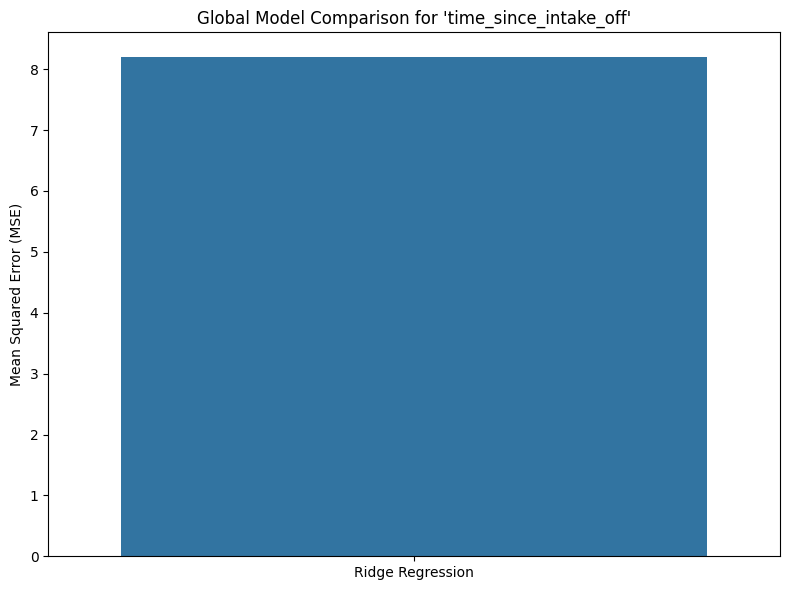

Per-Patient Model - Ridge Regression Overall MSE: 13.444


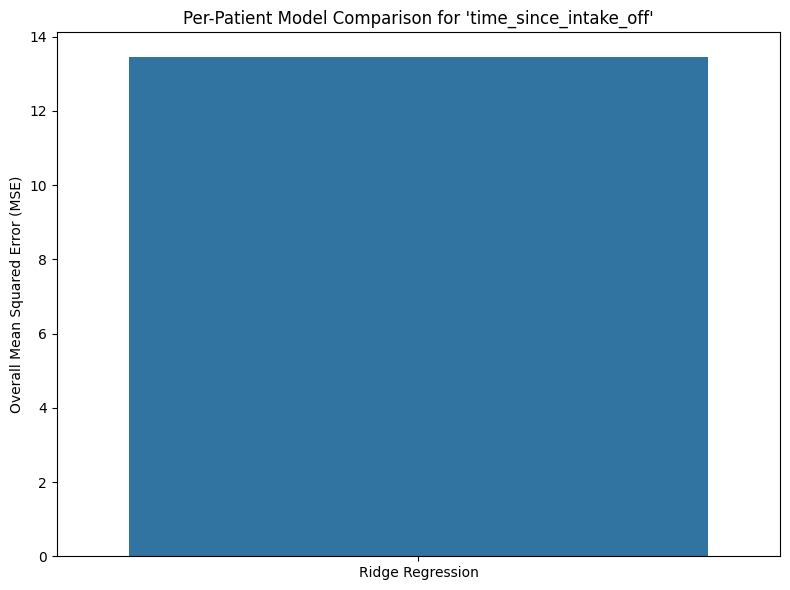

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.base import clone

# Regressors from scikit-learn
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# =============================================================================
# PART 1: GLOBAL MODEL EVALUATION FOR "time_since_intake_off"
# =============================================================================

# Filter the data to rows with non-missing "time_since_intake_off"
df_reg = data[data['time_since_intake_off'].notna()].copy()

# Define features and target:
# We exclude "time_since_intake_off" from the features because it's the target.
features = ['cohort', 'sexM', 'gene', 'age_at_diagnosis', 'age', 'ledd', 
            'on', 'off']
target = 'time_since_intake_off'

X = df_reg[features].copy()
y = df_reg[target].copy()

# Identify categorical and numerical features
cat_features = ['cohort', 'gene']
num_features = [col for col in features if col not in cat_features]

# Build a column transformer for preprocessing:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ]
)

# Define a dictionary of regressors to compare
regressors = {
   # 'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=10.0),
   # 'HistGradientBoosting': HistGradientBoostingRegressor(random_state=42),
}

results_global = {}

# Split the dataset into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train each regressor within a pipeline and compute the MSE on the test set
for name, reg in regressors.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', reg)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results_global[name] = mse
    print(f"Global Model - {name} MSE: {mse:.3f}")

plt.figure(figsize=(8,6))
sns.barplot(x=list(results_global.keys()), y=list(results_global.values()))
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Global Model Comparison for 'time_since_intake_off'")
plt.tight_layout()
plt.show()

# =============================================================================
# PART 2: PER-PATIENT APPROACH (LOOCV) FOR "time_since_intake_off"
# =============================================================================
#
# For the per-patient approach we use a simplified model (using only "age" as predictor)
# because many patients have only a few observations.
#
model_patient_mse = {name: {} for name in regressors.keys()}

for pid, group in data.groupby('patient_id'):
    # Only consider patients with at least 2 non-missing "time_since_intake_off" values
    if group['time_since_intake_off'].notna().sum() >= 2:
        df_valid = group[group['time_since_intake_off'].notna()]
        # Use "age" as the sole predictor
        X_patient = df_valid['age'].values.reshape(-1, 1)
        y_patient = df_valid['time_since_intake_off'].values
        
        for name, model in regressors.items():
            errors = []
            # Leave-One-Out Cross-Validation for the current patient
            for i in range(len(X_patient)):
                X_train_patient = np.delete(X_patient, i, axis=0)
                y_train_patient = np.delete(y_patient, i)
                X_test_patient = X_patient[i].reshape(1, -1)
                y_test_patient = y_patient[i]
                
                # Clone the model to ensure a fresh instance
                model_clone = clone(model)
                model_clone.fit(X_train_patient, y_train_patient)
                y_pred_patient = model_clone.predict(X_test_patient)
                errors.append((y_test_patient - y_pred_patient[0])**2)
            mse_patient = np.mean(errors)
            model_patient_mse[name][pid] = mse_patient

# Compute overall MSE for each model by averaging across patients
overall_mse_per_patient = {}
for name, mse_dict in model_patient_mse.items():
    overall_mse = np.mean(list(mse_dict.values()))
    overall_mse_per_patient[name] = overall_mse
    print(f"Per-Patient Model - {name} Overall MSE: {overall_mse:.3f}")

plt.figure(figsize=(8,6))
sns.barplot(x=list(overall_mse_per_patient.keys()), y=list(overall_mse_per_patient.values()))
plt.ylabel("Overall Mean Squared Error (MSE)")
plt.title("Per-Patient Model Comparison for 'time_since_intake_off'")
plt.tight_layout()
plt.show()

In [268]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# -------------------------------
# 1. Prepare Training Data (non-missing "time_since_intake_off")
# -------------------------------
df_train = data[data['time_since_intake_off'].notna()].copy()

# Define features and target for predicting "time_since_intake_off"
features = ['cohort', 'sexM', 'gene', 'age_at_diagnosis', 'age', 'ledd', 
            'time_since_intake_on', 'on', 'off']
target = 'time_since_intake_off'

X_train = df_train[features].copy()
y_train = df_train[target].copy()

# Identify categorical and numerical features
cat_features = ['cohort', 'gene']
num_features = [col for col in features if col not in cat_features]

# Build a column transformer for preprocessing:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ]
)

# -------------------------------
# 2. Build and Train the Global Pipeline with Ridge Regression
# -------------------------------
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

# Train the pipeline on the non-missing rows
pipeline.fit(X_train, y_train)

# -------------------------------
# 3. Impute Missing "time_since_intake_off" Values
# -------------------------------
# Select rows where "time_since_intake_off" is missing
df_missing = data[data['time_since_intake_off'].isna()].copy()
X_missing = df_missing[features].copy()

# Predict "time_since_intake_off" for missing rows using the trained pipeline
predicted_time_off = pipeline.predict(X_missing)

# Fill the missing values in the original DataFrame
data.loc[data['time_since_intake_off'].isna(), 'time_since_intake_off'] = predicted_time_off

print("Missing 'time_since_intake_off' values have been imputed using Ridge Regression (global model).")

# (Optional) Verify imputation for a sample patient
sample_patient = data[data['patient_id'] == 'IPLP5212']

Missing 'time_since_intake_off' values have been imputed using Ridge Regression (global model).


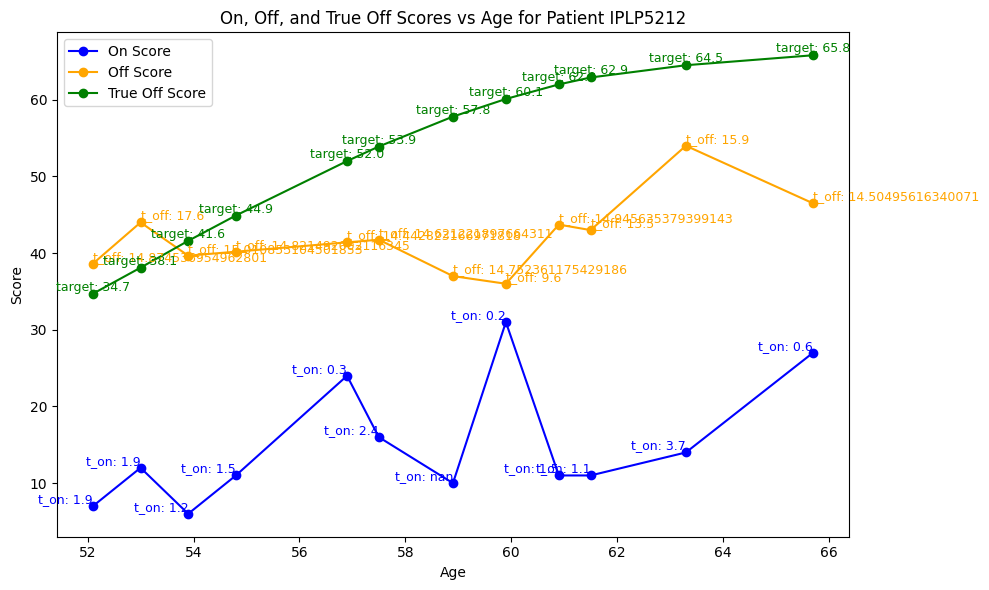

In [270]:
df_patient = data[data['patient_id'] == 'IPLP5212']

plt.figure(figsize=(10, 6))

# Plot On Score vs Age
on_data = df_patient.dropna(subset=['on'])
plt.plot(on_data['age'], on_data['on'], marker='o', linestyle='-', label='On Score', color='blue')
for _, row in on_data.iterrows():
    plt.text(row['age'], row['on'], f"t_on: {row['time_since_intake_on']}",
             fontsize=9, color='blue', verticalalignment='bottom', horizontalalignment='right')

# Plot Off Score vs Age
off_data = df_patient.dropna(subset=['off'])
plt.plot(off_data['age'], off_data['off'], marker='o', linestyle='-', label='Off Score', color='orange')
for _, row in off_data.iterrows():
    plt.text(row['age'], row['off'], f"t_off: {row['time_since_intake_off']}",
             fontsize=9, color='orange', verticalalignment='bottom', horizontalalignment='left')

# Plot True Off Score (Target) vs Age
target_data = df_patient.dropna(subset=['target'])
plt.plot(target_data['age'], target_data['target'], marker='o', linestyle='-', label='True Off Score', color='green')
for _, row in target_data.iterrows():
    plt.text(row['age'], row['target'], f"target: {row['target']}",
             fontsize=9, color='green', verticalalignment='bottom', horizontalalignment='center')

plt.xlabel("Age")
plt.ylabel("Score")
plt.title("On, Off, and True Off Scores vs Age for Patient IPLP5212")
plt.legend()
plt.tight_layout()
plt.show()

In [272]:
## Same for time since on 

import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# -------------------------------
# 1. Prepare Training Data (non-missing "time_since_intake_off")
# -------------------------------
df_train = data[data['time_since_intake_on'].notna()].copy()

# Define features and target for predicting "time_since_intake_off"
features = ['cohort', 'sexM', 'gene', 'age_at_diagnosis', 'age', 'ledd', 
            'time_since_intake_off', 'on', 'off']
target = 'time_since_intake_on'

X_train = df_train[features].copy()
y_train = df_train[target].copy()

# Identify categorical and numerical features
cat_features = ['cohort', 'gene']
num_features = [col for col in features if col not in cat_features]

# Build a column transformer for preprocessing:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ]
)

# -------------------------------
# 2. Build and Train the Global Pipeline with Ridge Regression
# -------------------------------
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

# Train the pipeline on the non-missing rows
pipeline.fit(X_train, y_train)

# -------------------------------
# 3. Impute Missing "time_since_intake_off" Values
# -------------------------------
# Select rows where "time_since_intake_off" is missing
df_missing = data[data['time_since_intake_on'].isna()].copy()
X_missing = df_missing[features].copy()

# Predict "time_since_intake_off" for missing rows using the trained pipeline
predicted_time_off = pipeline.predict(X_missing)

# Fill the missing values in the original DataFrame
data.loc[data['time_since_intake_on'].isna(), 'time_since_intake_on'] = predicted_time_off

print("Missing 'time_since_intake_on' values have been imputed using Ridge Regression (global model).")

# (Optional) Verify imputation for a sample patient
sample_patient = data[data['patient_id'] == 'IPLP5212']

Missing 'time_since_intake_on' values have been imputed using Ridge Regression (global model).


# fill Age at diagnosis

Linear Regression MSE: 5.824
Ridge Regression MSE: 5.824
Decision Tree MSE: 9.217
Random Forest MSE: 4.657


/Users/vakili/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:56:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost MSE: 4.539


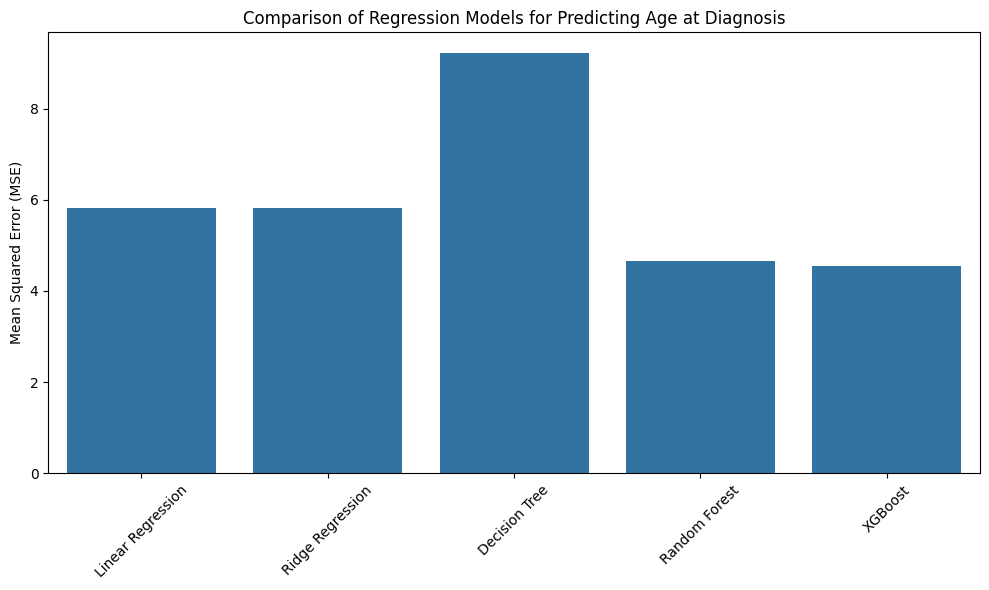

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Regressors from scikit-learn and xgboost
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# -----------------------------------------------------
# 1. Prepare the data to predict age_at_diagnosis
# -----------------------------------------------------
# Filter to rows with non-missing age_at_diagnosis values
df_reg = data[data['age_at_diagnosis'].notna()].copy()

# Define features and target:
features = ['gene', 'sexM', 'age', 'ledd', 'on', 'off', 
            'time_since_intake_on', 'time_since_intake_off']
target = 'age_at_diagnosis'

X = df_reg[features].copy()
y = df_reg[target].copy()

# Identify categorical and numerical features
cat_features = [ 'gene']
num_features = [col for col in features if col not in cat_features]

# Build a column transformer for preprocessing:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ]
)

# -----------------------------------------------------
# 2. Define a dictionary of regression models to compare, including XGBoost
# -----------------------------------------------------
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(use_label_encoder=False, eval_metric='rmse', random_state=42)
}

results = {}

# -----------------------------------------------------
# 3. Split the data and train/evaluate each regressor
# -----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, reg in regressors.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', reg)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse
    print(f"{name} MSE: {mse:.3f}")

# -----------------------------------------------------
# 4. Plot the MSE values for comparison
# -----------------------------------------------------
plt.figure(figsize=(10,6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of Regression Models for Predicting Age at Diagnosis")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [279]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# -------------------------------
# 1. Prepare Training Data (non-missing "age_at_diagnosis")
# -------------------------------
df_train = data[data['age_at_diagnosis'].notna()].copy()

# Define features and target for predicting "age_at_diagnosis"
features = ['cohort', 'gene', 'sexM', 'age', 'ledd', 'on', 'off',
            'time_since_intake_on', 'time_since_intake_off']
target = 'age_at_diagnosis'

X_train = df_train[features].copy()
y_train = df_train[target].copy()

# Identify categorical and numerical features
cat_features = ['cohort', 'gene']
num_features = [col for col in features if col not in cat_features]

# -------------------------------
# 2. Build the Preprocessing Pipeline
# -------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ]
)

# -------------------------------
# 3. Build and Train the Pipeline with XGBRegressor
# -------------------------------
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(use_label_encoder=False, eval_metric='rmse', random_state=42))
])

pipeline.fit(X_train, y_train)

# -------------------------------
# 4. Predict and Fill Missing "age_at_diagnosis" Values
# -------------------------------
df_missing = data[data['age_at_diagnosis'].isna()].copy()
X_missing = df_missing[features].copy()

predicted_age = pipeline.predict(X_missing)

# Fill the missing values in the original DataFrame
data.loc[data['age_at_diagnosis'].isna(), 'age_at_diagnosis'] = predicted_age

print("Missing 'age_at_diagnosis' values have been imputed using XGBRegressor.")

/Users/vakili/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:58:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Missing 'age_at_diagnosis' values have been imputed using XGBRegressor.


In [280]:
print('TRAIN SET MISSING VALUES (%):')
print(X_train.isna().sum()*100/len(X_train))
print('')

TRAIN SET MISSING VALUES (%):
cohort                   0.0
gene                     0.0
sexM                     0.0
age                      0.0
ledd                     0.0
on                       0.0
off                      0.0
time_since_intake_on     0.0
time_since_intake_off    0.0
dtype: float64

